In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [21]:
# Load dataset
df = pd.read_csv('pokemon.csv')

In [22]:
# Preprocessing
# One-hot encoding
df_ohe = pd.get_dummies(df.drop('Type 1', axis=1))

In [23]:
# Normalisasi
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_ohe), columns=df_ohe.columns)

In [24]:
# Menambahkan kolom Type 1 kembali
df_scaled['Type 1'] = df['Type 1']

In [25]:
# Pemilihan Fitur
# Metode Filter
selector = SelectKBest(chi2, k=5)
X_selected = selector.fit_transform(np.abs(df_scaled.drop('Type 1', axis=1)), df['Type 1'])

In [26]:
features = df_scaled.columns.tolist()

# Ambil nama fitur yang dipilih
selected_features = [features[i] for i in selector.get_support(indices=True)]

In [27]:
# Buat dataframe dari hasil pemilihan fitur
df_selected = df_scaled[selected_features]

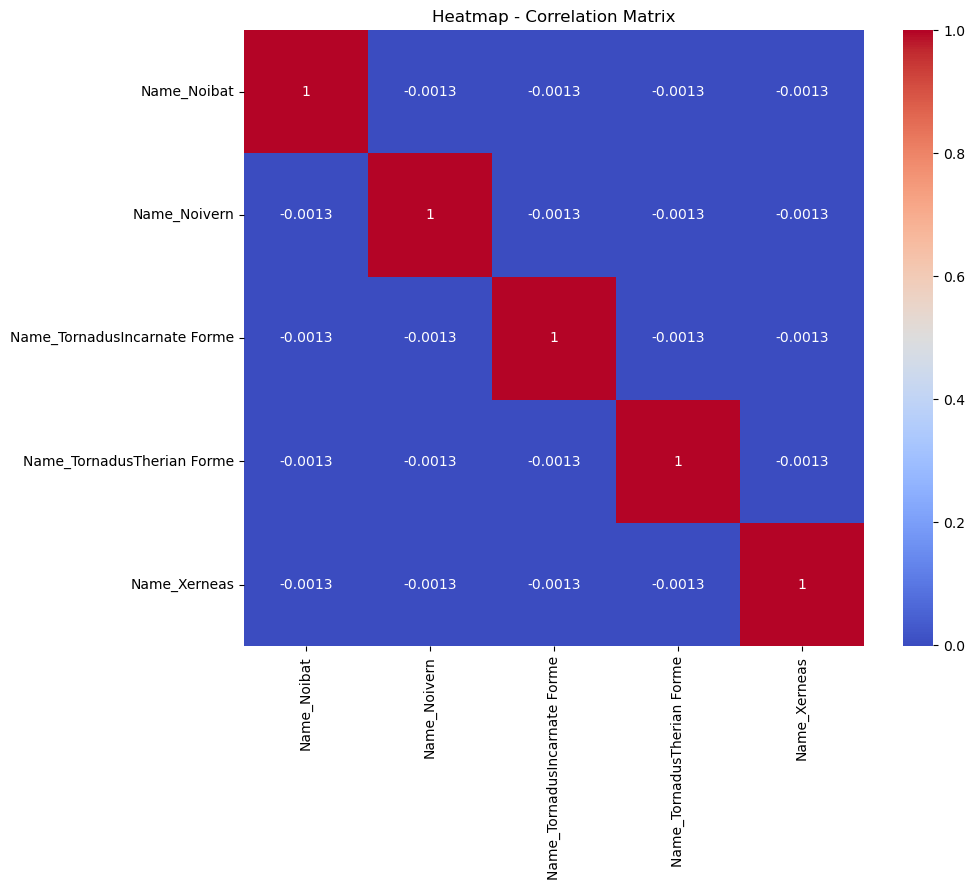

In [28]:
# Buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_selected.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap - Correlation Matrix")
plt.show()

In [29]:
# Evaluasi
# Split dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, df['Type 1'], test_size=0.3, random_state=42)

In [30]:
# Latih model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
# Uji model
y_pred = model.predict(X_test)

In [32]:
# Evaluasi kinerja model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-score:", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.14583333333333334
Precision: 0.008101851851851853
Recall: 0.05555555555555555
F1-score: 0.014141414141414142


In [33]:
# Hasil dataframe yang sudah dipreprocess
print("\nDataframe after preprocessing:\n", df_scaled)


Dataframe after preprocessing:
             #     Total        HP    Attack   Defense   Sp. Atk   Sp. Def  \
0   -1.737705 -0.976765 -0.950626 -0.924906 -0.797154 -0.239130 -0.248189   
1   -1.732902 -0.251088 -0.362822 -0.524130 -0.347917  0.219560  0.291156   
2   -1.728100  0.749845  0.420917  0.092448  0.293849  0.831146  1.010283   
3   -1.728100  1.583957  0.420917  0.647369  1.577381  1.503891  1.729409   
4   -1.723297 -1.051836 -1.185748 -0.832419 -0.989683 -0.392027 -0.787533   
..        ...       ...       ...       ...       ...       ...       ...   
795  1.710678  1.375429 -0.754692  0.647369  2.443765  0.831146  2.808099   
796  1.710678  2.209541 -0.754692  2.497104  1.160233  2.665905  1.369846   
797  1.715480  1.375429  0.420917  0.955658 -0.444182  2.360112  2.088973   
798  1.715480  2.042718  0.420917  2.497104 -0.444182  2.971699  2.088973   
799  1.720283  1.375429  0.420917  0.955658  1.481116  1.748526  0.650720   

        Speed  Generation  Legendary  ... 

In [34]:
# Hasil pemilihan fitur
print("\nSelected features:", selected_features)


Selected features: ['Name_Noibat', 'Name_Noivern', 'Name_TornadusIncarnate Forme', 'Name_TornadusTherian Forme', 'Name_Xerneas']


In [35]:
# Hasil evaluasi model
print("\nEvaluation results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-score:", f1_score(y_test, y_pred, average='macro'))


Evaluation results:
Accuracy: 0.14583333333333334
Precision: 0.008101851851851853
Recall: 0.05555555555555555
F1-score: 0.014141414141414142
